<a href="https://colab.research.google.com/github/aakashv000/Machine-Learning-Lab-CS3103/blob/master/Lecture_Notes_Stuff2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print('kali');

kali


# Simplistic SVM formulation

For those points $x_i \in class +1 \longrightarrow w.x_i = +1$
and for all those points $x_j \in class -1 \longrightarrow w.x_j = -1$

However, this is a *very simplistic* formulation! Lets live with it for a while.

We take class -1 and class +1 points and try to separate them with two parallel planes.

However, there can be innumerably many such planes (as depicted in the class).

How can we automatically determine a **a margin** i.e. two parallel planes that maximally separate the points? Some of the **FAQ** questions below.

## Why do we need to find maximally separating margin? Why can't this be a minimal margin detection problem altogether?

The answer is simple.

Identifying a small margin $\Longrightarrow$ the margin boundaries will be close to both of the two classes $\Longrightarrow$ The chance of mis-classification will be high.

Based on this intuition, **we need a maximal margin**.

## Can the margin not touch any points?

No. The margin has two planes. One plane **must touch** at least one of the class -1 points, and the other plane must touch at least one of the class +1 points.

## Can there be some points within the margin?
In simplistic formulation, NO. The margin is utterly pure. However in flexible formulation, there can be some points within the margin.

## Can there be points on the wrong side in the simplistic formulation?
Yes. Those add to the error. You can only *minimize error* and *may not make it zero*.

# Simplistic SVM Formulation

* If there are two points $A,B \in class -1$ then, $w.A = -1$ and $w.B = -1$ and this $\Longrightarrow$ $w.(A-B) = 0 \Longrightarrow w \perp (A-B)$ i.e. $w$ is perpendicular to the plane containing $A,B$.


* Let there be two points $P,Q \ni w.P = -1 \wedge w.Q = +1$. If P and Q lie on the vector w, then $(\exists \lambda):  Q = P + \lambda w$. 


* Consider $Q - P = \lambda w \Longrightarrow w.(Q-P) = \lambda w.w $

* But we know that P,Q are on the two planes of the margin $\Longrightarrow w.Q - w.P = \lambda w.w \Longrightarrow 1 - (-1) = 2 = \lambda w.w$

* This means that $\lambda = \frac{2}{w.w}$

* Maximizing margin $\Longrightarrow |Q-P| = \lambda |w| = \frac{2}{w.w} |w| = \frac{2}{|w|}$

* We can formulate maximizing margin problem as the following equivalent steps
 *  is equivalent to $ w^* =  \underset{w}{argmax} \frac{2}{|w|} $
 *  is equivalent to $\equiv w^* = \underset{w}{argmin} \frac{|w|}{2} $
 * is equivalent to $\equiv \underset{w}{argmin} \frac{|w|^2}{2}$
 
The ** optimal value of w is all same ** and you can conviniently reformulate the optimization function accordingly.


## Now the prediction error constraints part of the formulation

* We know $(\forall i \in class -1): w.x_i = -1$
* We also know $(\forall j \in class +1): w.x_j = +1$

Now, we can fuse both the constraints and write in a single line as $(\forall i \in class -1 \cup class +1): y_i * (w.x_i) = +1 $

This is for the ideal scenario, for the **error scenarios,**  $(\forall i \in class -1 \cup class +1): y_i * (w.x_i) = -1 $

We can bring the **constraint into optimization function** and do it as *unconstrained optimization* formulation as follows.

$w^* = \underset{w}{argmin} \frac{|w|^2}{2} + \mu \sum_{i=1}^{i=N}(1 - y_i*(w.x_i))$

## The simplistic SVM formulation needs to be modified

Because, $w.x_i = +1$ or $w.x_i = -1$ is a strong equality constraint, and **we want only sign to be accurate** and do not bother about being +1 or -1 exactly, we can reformulate the constraints part alone as follows.

$(\forall x_i \in class +1): w.x_i \ge +1$

$(\forall x_i \in class -1): w.x_i \le -1$


Then also, the **demand for each point is** $(\forall i): y_i*(w*x_i) \ge 1$ and correspondingly **error** for each point is, $1-y_i*(w*x_i)$

Plugging it back in the optimization function, the above formulation still looks fine.

# Soft margin SVM

This SVM allows, some points to lie within the margin. *How to allow them with some error score* is as follows.

Let $(\exists \xi_i): \xi_i \ge 0 $ be the error associate with each point **to lie within the margin**. 

Then the points behave as $(\forall x_i \in class +1): w.x_i \ge 1-\xi_i$ and $(\forall x_j \in class -1): w.x_j \le -1 + \xi_j$

Combining them into a single equation, this becomes $(\forall i): y_i *(w*x_i) \ge 1 - \xi_i$

Then $\xi_i \ge 1 - y_i*(w.x_i)$

Please observe that this is same as **error as in simplistic SVM** however this is also accounting for **error due to falling within margin as well**

Then the optimization function stays as it is,

$w^* = \underset{w}{argmin} \frac{|w|^2}{2} + \sum_{i=1}^{i=N}\xi_i$


We can put some **penalty** for constraint violations and re-formulate as

$w^* = \underset{w}{argmin} \frac{|w|^2}{2} + C*\sum_{i=1}^{i=N}\xi_i$

## Let us add some complication

We need to bother only about cases where $\xi_i > 0$ and ignore the cases where $\xi < 0$, because when $\xi_i < 0$ it is already the case that $\Longrightarrow y_i*(w*x_i) > 1$. We want to ignore the cases in the optimization formulation.

The modification becomes,

$w^* = \underset{w}{argmin} \frac{|w|^2}{2} + C*\sum_{i=1}^{i=N}max(0,\xi_i)$

This **ensures that if at all any +ve $\xi_i$'s are there, they get reduced during weight updates**


So, the final formulation for softmargin SVM (non kernel) is,

$w^* = \underset{w}{argmin} \frac{|w|^2}{2} + C*\sum_{i=1}^{i=N}max(0,1-y_i*(w.x_i))$
























Reference material - https://scikit-learn.org/stable/auto_examples/linear_model/plot_sgd_loss_functions.html

Automatically created module for IPython interactive environment


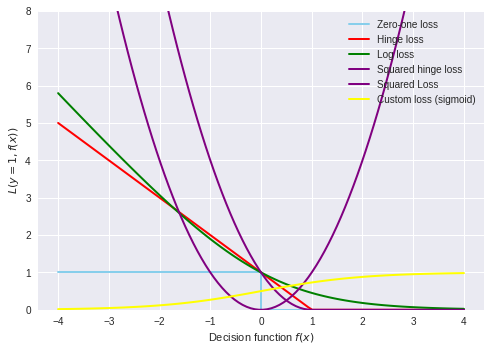

In [36]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt


xmin, xmax = -4, 4
xx = np.linspace(xmin, xmax, 100)
lw = 2
plt.plot([xmin, 0, 0, xmax], [1, 1, 0, 0], color='skyblue', lw=lw,
         label="Zero-one loss")
plt.plot(xx, np.where(xx < 1, 1 - xx, 0), color='red', lw=lw,
         label="Hinge loss")
plt.plot(xx, np.log2(1 + np.exp(-xx)), color='green', lw=lw,
         label="Log loss")
plt.plot(xx, np.where(xx < 1, 1 - xx, 0) ** 2, color='purple', lw=lw,
         label="Squared hinge loss")
plt.plot(xx, xx ** 2, color='purple', lw=lw,
         label="Squared Loss")
plt.plot(xx, 1/(1 + np.exp(-xx)), color='yellow', lw=lw,
         label="Custom loss (sigmoid)")
plt.ylim((0, 8))
plt.legend(loc="upper right")
plt.xlabel(r"Decision function $f(x)$")
plt.ylabel("$L(y=1, f(x))$")
plt.show()

Automatically created module for IPython interactive environment


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log2
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log2
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log2
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log2
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log2
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log2
  del sys.path[0]


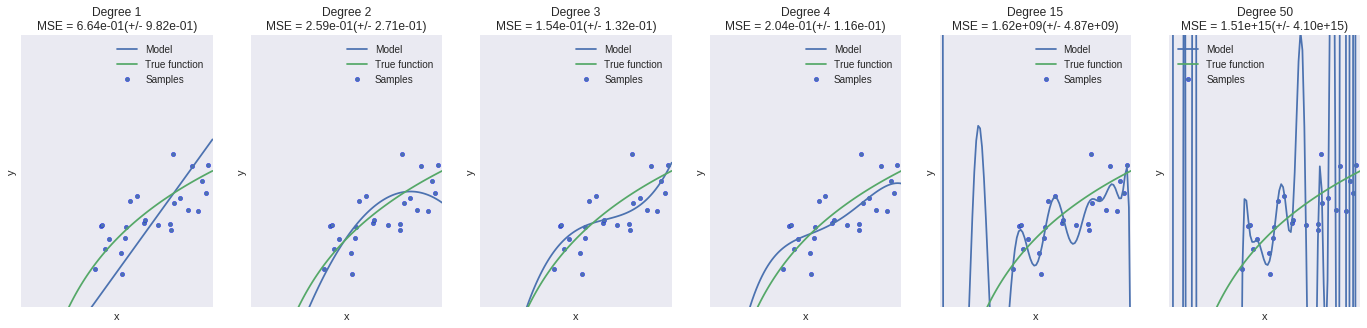

In [42]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
#     return np.cos(1.5 * np.pi * X)
    return np.log2(X)

np.random.seed(0)

n_samples = 30
degrees = [1, 2, 3, 4, 15, 50]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.3    ### ! noise factor

plt.figure(figsize=(len(degrees)*4, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

Automatically created module for IPython interactive environment


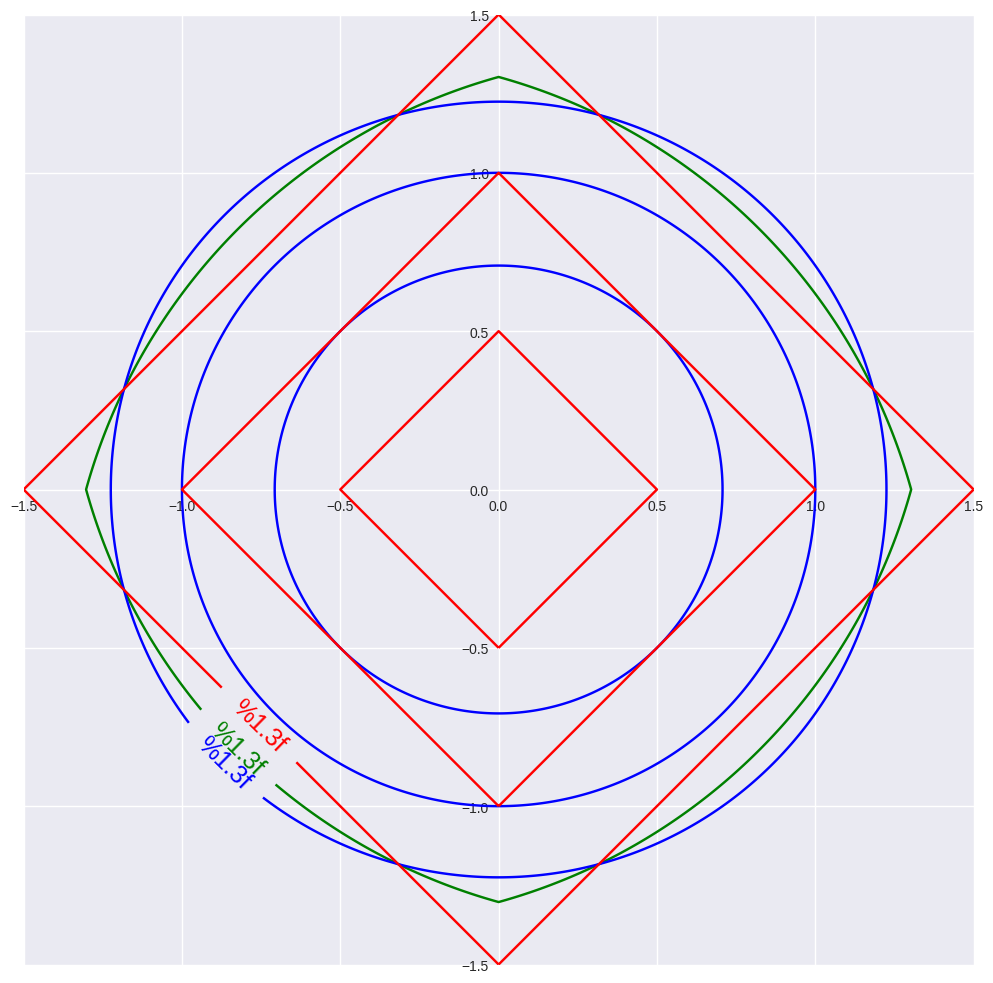

In [4]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

l1_color = "red"
l2_color = "blue"
elastic_net_color = "green"

line = np.linspace(-1.5, 1.5, 1001)
xx, yy = np.meshgrid(line, line)

l2 = xx ** 2 + yy ** 2
l1 = np.abs(xx) + np.abs(yy)
rho = 0.5
elastic_net = rho * l1 + (1 - rho) * l2

plt.figure(figsize=(10, 10), dpi=100)
ax = plt.gca()

elastic_net_contour = plt.contour(xx, yy, elastic_net, levels=[1.5],
                                  colors=elastic_net_color)
l2_contour = plt.contour(xx, yy, l2, levels=[0, 0.5, 1, 1.5], colors=l2_color)
l1_contour = plt.contour(xx, yy, l1, levels=[0, 0.5, 1, 1.5], colors=l1_color)
ax.set_aspect("equal")
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')

plt.clabel(elastic_net_contour, inline=1, fontsize=18,
           fmt={1.0: 'elastic-net'}, manual=[(-1, -1)])
plt.clabel(l2_contour, inline=1, fontsize=18,
           fmt={1.0: 'L2'}, manual=[(-1, -1)])
plt.clabel(l1_contour, inline=1, fontsize=18,
           fmt={1.0: 'L1'}, manual=[(-1, -1)])

plt.tight_layout()
plt.show()

Refer to different types of curves & plotting here - https://www.wolframalpha.com/examples/mathematics/calculus-and-analysis/applications-of-calculus/

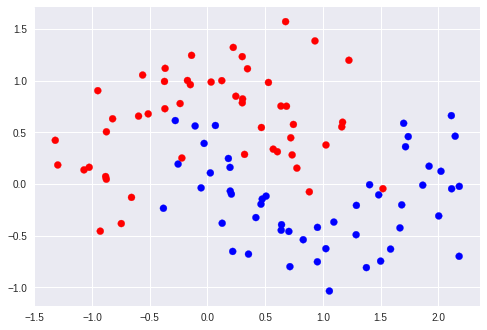

In [5]:

from sklearn.datasets import make_moons, make_circles, make_classification
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

#X, y = make_circles(noise=0.2, factor=0.5, random_state=1)
X, y = make_moons(noise=0.3, random_state=0)

plt.scatter(X[:,0],X[:,1],c=y,cmap=ListedColormap(['#FF0000', '#0000FF']))

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC

clf = LogisticRegression(solver='lbfgs')
#clf = SGDClassifier(loss='hinge')

clf.fit(X,y)

y_pred = clf.predict(X)

tp,tn,fp,fn = confusion_matrix(y_true=y,y_pred=y_pred).ravel()

print (tp,tn,fp,fn)


42 8 8 42


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4)

clf = LogisticRegression(solver='lbfgs')
#clf = SVC(kernel='linear',probability=True)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print (confusion_matrix(y_true=y_test,y_pred=y_pred).ravel())


[18  1  4 17]


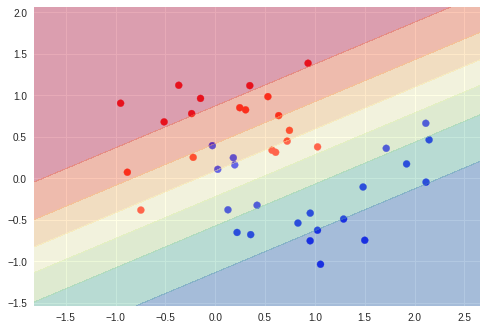

In [8]:
import numpy as np

h = 0.02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

Z = Z.reshape(xx.shape)

plt.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=ListedColormap(['#FF0000', '#0000FF']))
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=.4)

Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[13  0  0]
 [ 0 11  5]
 [ 0  0  9]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.69 0.31]
 [0.   0.   1.  ]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


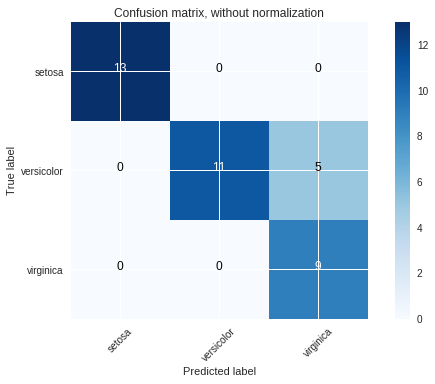

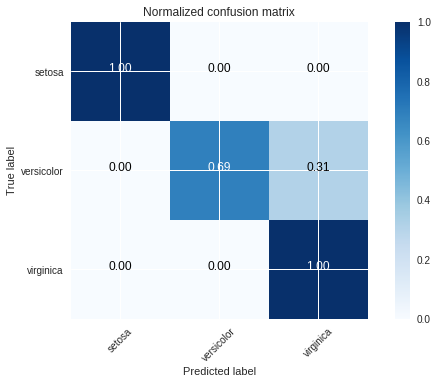

In [9]:
print(__doc__)

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier, LogisticRegression

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
#classifier = svm.SVC(kernel='linear', C=0.01)
#classifier = SGDClassifier(loss='hinge')
classifier = LogisticRegression()
y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


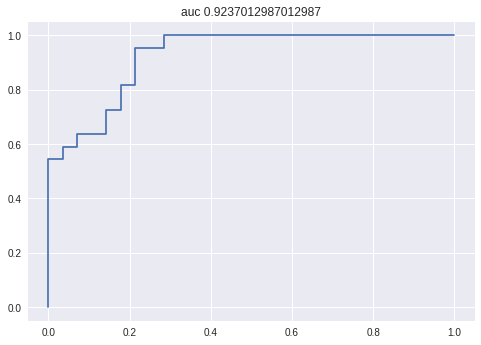

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import auc
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

X, y = make_moons()

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
#clf = LogisticRegression(solver='lbfgs')
clf = GridSearchCV(LogisticRegression(solver='lbfgs'), [{'C':[0.1,1.0,10.0],'solver':['liblinear','lbfgs']}], cv=5)
clf.fit(X_train,y_train) 

y_score = clf.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_true=y_test,y_score=y_score)
auc = auc(fpr,tpr)

plt.clf()
plt.title('auc '+str(auc))
plt.plot(fpr, tpr)
plt.show()



In [11]:
print(thresholds)
epsilon = 0.01
div_arr = np.divide(tpr+epsilon,fpr+epsilon)
index = np.argmax(div_arr)
print(div_arr)
print (index,tpr[index],fpr[index],thresholds[index])

[2.00e+00 9.96e-01 9.05e-01 8.83e-01 8.75e-01 8.34e-01 8.28e-01 5.86e-01
 3.65e-01 2.84e-01 1.97e-01 1.39e-01 6.51e-02 4.72e-02 4.41e-02 1.45e-03]
[ 1.    5.55 55.55 12.15 13.14  7.38  7.94  4.23  4.82  3.91  4.39  3.69
  4.3   3.26  3.42  1.  ]
2 0.5454545454545454 0.0 0.9050019140306406


Automatically created module for IPython interactive environment


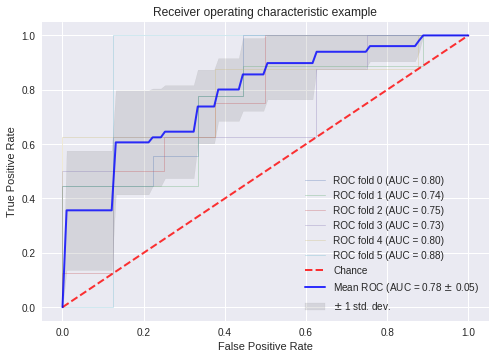

In [12]:
print(__doc__)

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

# #############################################################################
# Data IO and generation

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape

# Add noisy features
random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [13]:
from sklearn.model_selection import cross_val_score

X,y = make_moons()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4)

clf = LogisticRegression(solver='lbfgs')

cv_scores = cross_val_score(clf,X_train,y_train,cv=5)

print(cv_scores)


[0.92 0.92 0.92 0.92 0.75]


In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
clf = GridSearchCV(LogisticRegression(solver='lbfgs'), [{'C':[0.1,1.0,10.0],'solver':['liblinear','lbfgs']}], cv=5)
clf.fit(X_train,y_train)

params = clf.best_params_

print(params)

print(clf.cv_results_)

y_pred = clf.predict(X_test)

print(classification_report(y_test,y_pred))




{'C': 10.0, 'solver': 'liblinear'}
{'mean_fit_time': array([0., 0., 0., 0., 0., 0.]), 'std_fit_time': array([1.89e-04, 2.84e-04, 1.41e-05, 4.40e-05, 2.62e-05, 8.84e-05]), 'mean_score_time': array([0., 0., 0., 0., 0., 0.]), 'std_score_time': array([2.15e-04, 5.90e-05, 2.60e-05, 2.73e-04, 8.88e-06, 3.14e-05]), 'param_C': masked_array(data=[0.1, 0.1, 1.0, 1.0, 10.0, 10.0],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_solver': masked_array(data=['liblinear', 'lbfgs', 'liblinear', 'lbfgs',
                   'liblinear', 'lbfgs'],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 0.1, 'solver': 'liblinear'}, {'C': 0.1, 'solver': 'lbfgs'}, {'C': 1.0, 'solver': 'liblinear'}, {'C': 1.0, 'solver': 'lbfgs'}, {'C': 10.0, 'solver': 'liblinear'}, {'C': 10.0, 'solver': 'lbfgs'}], 'split0_test_score': array([0.92, 0.92, 0.92, 0.92, 0.92, 0.92]), 'spl

Automatically created module for IPython interactive environment


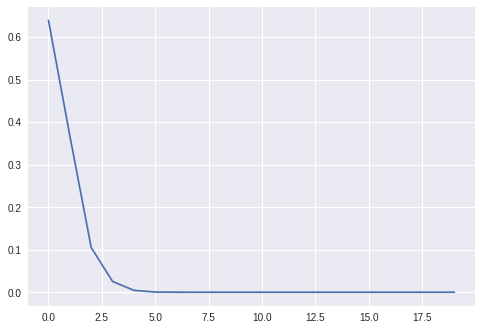

In [15]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits, load_boston
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 100
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))[:,np.newaxis]
y = true_fun(X) + np.random.randn(n_samples) * 0.1


clf = Pipeline([('poly',PolynomialFeatures()),('linreg',LinearRegression())])
#clf = LinearRegression()

#clf.set_params(poly__degree=1)
#scores = cross_val_score(clf, X, y, cv=5,scoring='neg_mean_squared_error')
#print(scores)

param_range = range(0,20)

mean_scores = []

for param in param_range:
  clf.set_params(poly__degree=param)
  scores = cross_val_score(clf,X,y,cv=10,scoring='neg_mean_squared_error')
  mean_scores.append(-1*np.mean(scores))
  
plt.plot(param_range,mean_scores)
  
 

  


Automatically created module for IPython interactive environment


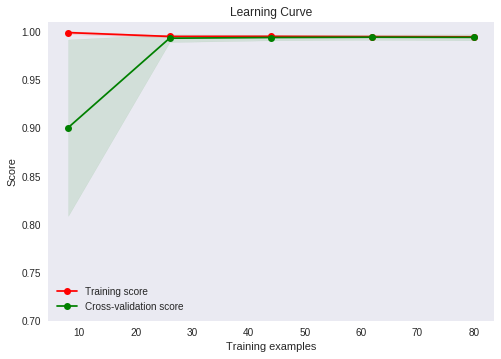

In [16]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits, load_boston
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import PolynomialFeatures


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


#digits = load_digits()
#X, y = digits.data, digits.target

#X,y = load_boston(return_X_y=True)

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 100
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))[:,np.newaxis]
y = true_fun(X) + np.random.randn(n_samples) * 0.1


#title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
#cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
#estimator = GaussianNB()
#plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title = "Learning Curve"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
#estimator = SVC(gamma=0.001)
#estimator = LogisticRegression()
estimator = Pipeline([("poly",PolynomialFeatures(degree=3)),("linreg",LinearRegression())])
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

#Bias Variance Trade off

Please refer to Yasar Abu Mustafa, Caltech lectures on youtube. Also refer to Andrew Ng lectures on bias variance trade off.
* Ref - https://work.caltech.edu/library/081.pdf
* Ref - https://work.caltech.edu/library/080.pdf

We define Bias and Variance as follows -
* Bias= Average deviation of **actual - as best as possible model**
* Variance = Average deviation **prediction - as best as possible model**












In [0]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

n_samples = 2

def true_fun(X):
    return np.sin(X)

np.random.seed(0)

n_samples = 1000

X = np.linspace(0,2*np.pi,1000)[:,np.newaxis]
y = true_fun(X)

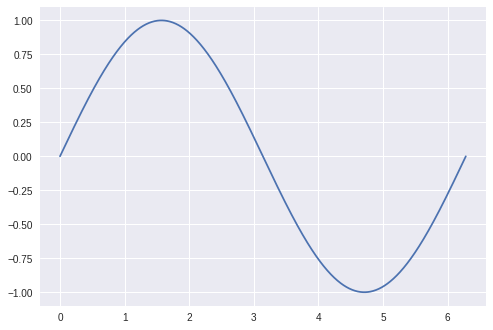

In [18]:
plt.plot(X,y)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [0]:
hypo_1 = Pipeline([('poly',PolynomialFeatures(degree=0)),('lin',LinearRegression(fit_intercept=False))])
hypo_2 = Pipeline([('poly',PolynomialFeatures(degree=1)),('lin',LinearRegression(fit_intercept=False))])

In [0]:
def myplot_biasvariance(clf=None,X_range=None,y_pred=None,subplt=None) :
  
  subplt.set_xlim([0,2*np.pi])
  subplt.set_ylim([-1,1])
  
  X_range = np.linspace(0,2*np.pi,10000)[:,np.newaxis]
  y_pred = clf.predict(X_range)
  
  subplt.plot(X_range,y_pred)

In [22]:
#Take two points at a time and plot two curves
np.random.seed(0)
X_2_pts = X[np.random.choice(range(len(X)),2),:]
y_2_pts = true_fun(X_2_pts)

print(len(X))

1000


In [0]:
from sklearn.base import clone
from copy import deepcopy

#Generate subsets of 2 points and plot the curves
def plot_multiple_training_sets(n_sets = 100) :
  
  print (n_sets)
  
  hypo_1_copies = []
  hypo_2_copies = []
  
  for i in range(n_sets) :
    
    X_2_pts = X[np.random.choice(range(len(X)),2),:]
    y_2_pts = true_fun(X_2_pts)
    
    hypo_1.fit(X_2_pts,y_2_pts)
    hypo_2.fit(X_2_pts,y_2_pts)
    
    myplot_biasvariance(clf=hypo_1,subplt=ax1)
    myplot_biasvariance(clf=hypo_2,subplt=ax2)
    
    hypo_1_copies.append(deepcopy(hypo_1))
    hypo_2_copies.append(deepcopy(hypo_2))
    
  return hypo_1_copies, hypo_2_copies
  

100


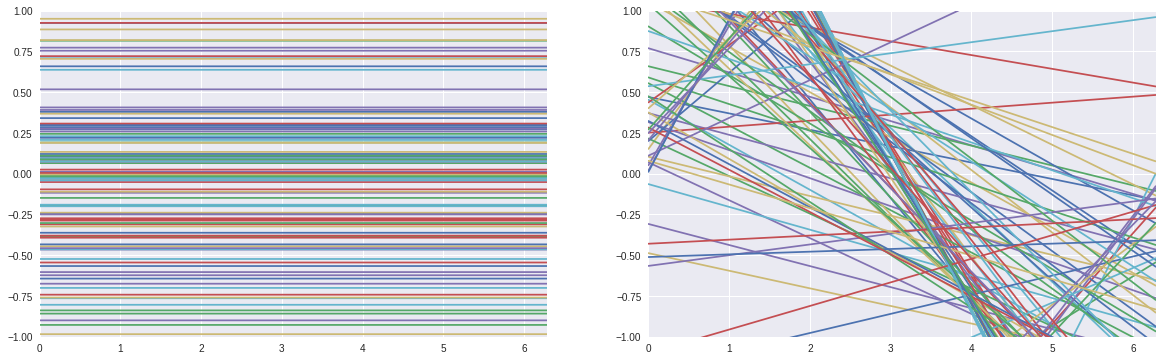

In [24]:
f = plt.figure(figsize=(20,6))

ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

hypo_1_copies, hypo_2_copies = plot_multiple_training_sets()

In [0]:
def compute_bias_scores(clf_list=None,X_range=None) :
  
  y_pred = np.array( [ np.mean([ clf.predict([[x]]) for clf in clf_list ] ) for x in X_range ] )
  
  return y_pred
  

In [0]:
def compute_variance_scores(clf_list=None,X_range=None) :
  
  y_pred = np.array( [ np.var([ clf.predict([[x]]) for clf in clf_list ] ) for x in X_range ] )
  
  return y_pred

In [0]:
X_range = np.linspace(0,2*np.pi,1000)

y_mean_pred1 = compute_bias_scores(hypo_1_copies,X_range)
y_mean_pred2 = compute_bias_scores(hypo_2_copies,X_range)

y_var_pred1 = compute_variance_scores(hypo_1_copies,X_range)
y_var_pred2 = compute_variance_scores(hypo_2_copies,X_range)

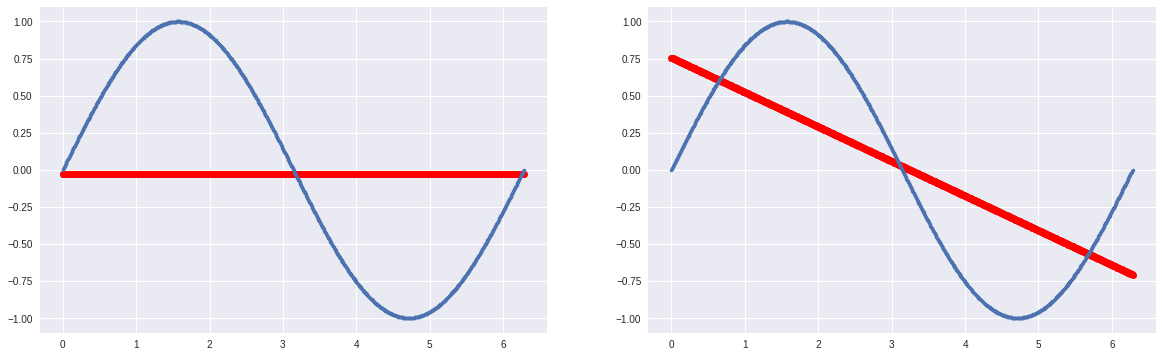

In [28]:
f = plt.figure(figsize=(20,6))

ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1.plot(X_range,y_mean_pred1,'ro')
ax2.plot(X_range,y_mean_pred2,'ro')

ax1.plot(X_range,true_fun(X_range),'.')
ax2.plot(X_range,true_fun(X_range),'.')

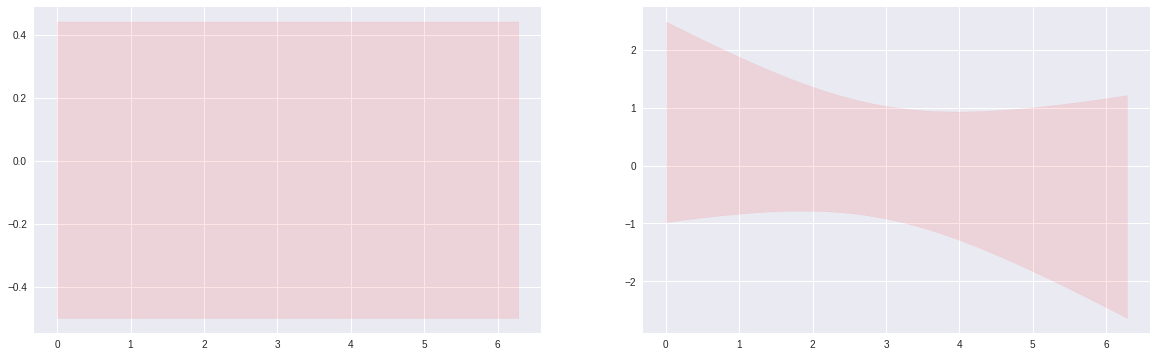

In [29]:
f = plt.figure(figsize=(20,6))

ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1.fill_between(X_range, y_mean_pred1 - np.sqrt(y_var_pred1),
                     y_mean_pred1 + np.sqrt(y_var_pred1), alpha=0.1,
                     color="r")

ax2.fill_between(X_range, y_mean_pred2 - np.sqrt(y_var_pred2),
                     y_mean_pred2 + np.sqrt(y_var_pred2), alpha=0.1,
                     color="r")


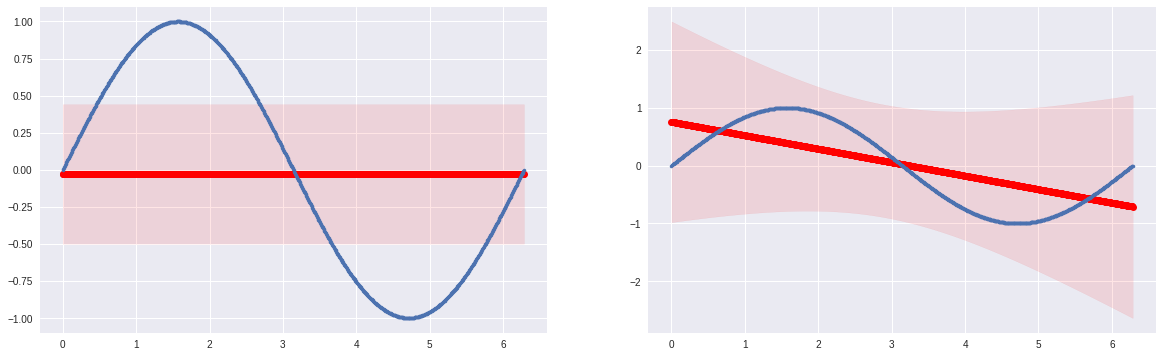

In [30]:
f = plt.figure(figsize=(20,6))

ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1.plot(X_range,y_mean_pred1,'ro')
ax2.plot(X_range,y_mean_pred2,'ro')

ax1.plot(X_range,true_fun(X_range),'.')
ax2.plot(X_range,true_fun(X_range),'.')

ax1.fill_between(X_range, y_mean_pred1 - np.sqrt(y_var_pred1),
                     y_mean_pred1 + np.sqrt(y_var_pred1), alpha=0.1,
                     color="r")

ax2.fill_between(X_range, y_mean_pred2 - np.sqrt(y_var_pred2),
                     y_mean_pred2 + np.sqrt(y_var_pred2), alpha=0.1,
                     color="r")

In [31]:
from sklearn.metrics import mean_squared_error as mse
#Calculate Bias
bias1 = mse(y_true=true_fun(X_range),y_pred=y_mean_pred1)
bias2 = mse(y_true=true_fun(X_range),y_pred=y_mean_pred2)

#Calculate Mean Variance
var1 = np.mean(y_var_pred1)
var2 = np.mean(y_var_pred2)

print (bias1, var1, "total error = ", (bias1+var1))

print (bias2, var2, "total error = ", (bias2+var2))

0.500307850719236 0.22108705400927506 total error =  0.7213949047285111
0.21347204407668013 1.7599796858303063 total error =  1.9734517299069865


In [0]:
#Compute average hypothesis for each case